In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms,viz,utils,evaluation
from cdlib.benchmark import LFR

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'karateclub', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [2]:
relationship = pd.read_csv("data_the_witcher1.csv",encoding='utf-8')
data = pd.DataFrame(relationship)
data_new = data.drop(columns='Unnamed: 0')
data_new.head(10)

,source,target
0,Niedamir,Geralt
1,Niedamir,Geralt
2,Niedamir,Geralt
3,Geralt,Niedamir
4,Geralt,Niedamir
5,Geralt,Niedamir
6,Niedamir,Geralt
7,Niedamir,Geralt
8,Geralt,Niedamir
9,Geralt,Niedamir


In [3]:
data_clean = pd.DataFrame(np.sort(data_new.values, axis = 1), columns = data_new.columns)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971 entries, 0 to 2970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  2971 non-null   object
 1   target  2971 non-null   object
dtypes: object(2)
memory usage: 46.5+ KB


In [4]:
data_clean['value'] = 1
data_clean = data_clean.groupby(['source','target'], sort = False, as_index = False).sum()
data_clean.head(5)

,source,target,value
0,Geralt,Niedamir,55
1,Eyck,Geralt,30
2,Dorregaray,Geralt,23
3,Dorregaray,Yennefer,56
4,Boholt,Niedamir,20


In [5]:
G = nx.from_pandas_edgelist(data_clean,
                           source = 'source',
                           target = 'target',
                           edge_attr = 'value',
                           create_using = nx.Graph())
print(G)

Graph with 68 nodes and 153 edges


In [6]:
import matplotlib.cm as cm
import community as louvain

pos = nx.random_layout(G)
com_louvain = louvain.best_partition(G)
print(com_louvain)

{'Geralt': 0, 'Niedamir': 1, 'Eyck': 1, 'Dorregaray': 1, 'Yennefer': 1, 'Boholt': 1, 'Yarpen': 1, 'Gyllenstiern': 1, 'Kennet': 1, 'Crinfrid': 1, 'Villentretenmerth': 1, 'Istredd': 0, 'Herbolth': 0, 'Ivo': 0, 'Two': 3, 'Dandelion': 5, 'Vespula': 5, 'Dainty': 5, 'Vimme': 5, 'Sulimir': 5, 'Ther': 5, 'Rhundurin': 5, 'Dudu': 5, "Sh'eenaz": 5, 'Gaspard': 6, 'Teleri': 6, 'Dalia': 6, 'Mestvin': 6, 'Essi': 5, 'Gerard': 0, 'Zelest': 0, 'Duke': 5, 'Veverka': 0, 'Akeretta': 0, 'Agloval': 5, 'Ebbing': 5, 'Juan': 5, 'Cynthia': 5, 'Braenn': 2, 'Ciri': 2, 'Kistrin': 2, 'Eithné': 2, 'Marck': 0, 'Voymir': 0, 'Alvina': 2, 'Vesemir': 2, 'Ervyll': 2, 'Freixenet': 2, 'Venzlav': 2, 'Ekkehard': 2, 'Viraxas': 2, 'Morenn': 2, 'Mona': 2, 'Pavetta': 0, 'Brick': 2, 'Junghans': 2, 'Levecque': 2, 'King': 2, 'Mousesack': 0, 'Yurga': 3, 'Visenna': 0, 'Triss': 3, 'Atlan': 3, 'Vanielle': 3, 'Lytta': 0, 'Roach': 3, 'Nadbor': 4, 'Sulik': 4}


In [7]:
from pyvis.network import Network
nx.set_node_attributes(G, com_louvain, 'group')
com_net = Network(notebook = True,height="800px",width="80%", bgcolor='#222222', font_color='white')
com_net.show_buttons(filter_= True)
com_net.from_nx(G)

com_net.show("louvain_communities.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [8]:
G1 = nx.from_pandas_edgelist(data_clean,
                           source = 'source',
                           target = 'target',
                           edge_attr = 'value',
                           create_using = nx.Graph())
print(G1)

Graph with 68 nodes and 153 edges


In [9]:
G2 = nx.from_pandas_edgelist(data_clean,
                           source = 'source',
                           target = 'target',
                           edge_attr = 'value',
                           create_using = nx.Graph())
print(G2)

Graph with 68 nodes and 153 edges


In [10]:
G3 = nx.from_pandas_edgelist(data_clean,
                           source = 'source',
                           target = 'target',
                           edge_attr = 'value',
                           create_using = nx.Graph())

In [11]:
G4 = nx.from_pandas_edgelist(data_clean,
                           source = 'source',
                           target = 'target',
                           edge_attr = 'value',
                           create_using = nx.Graph())

Girvan_Newmen graph


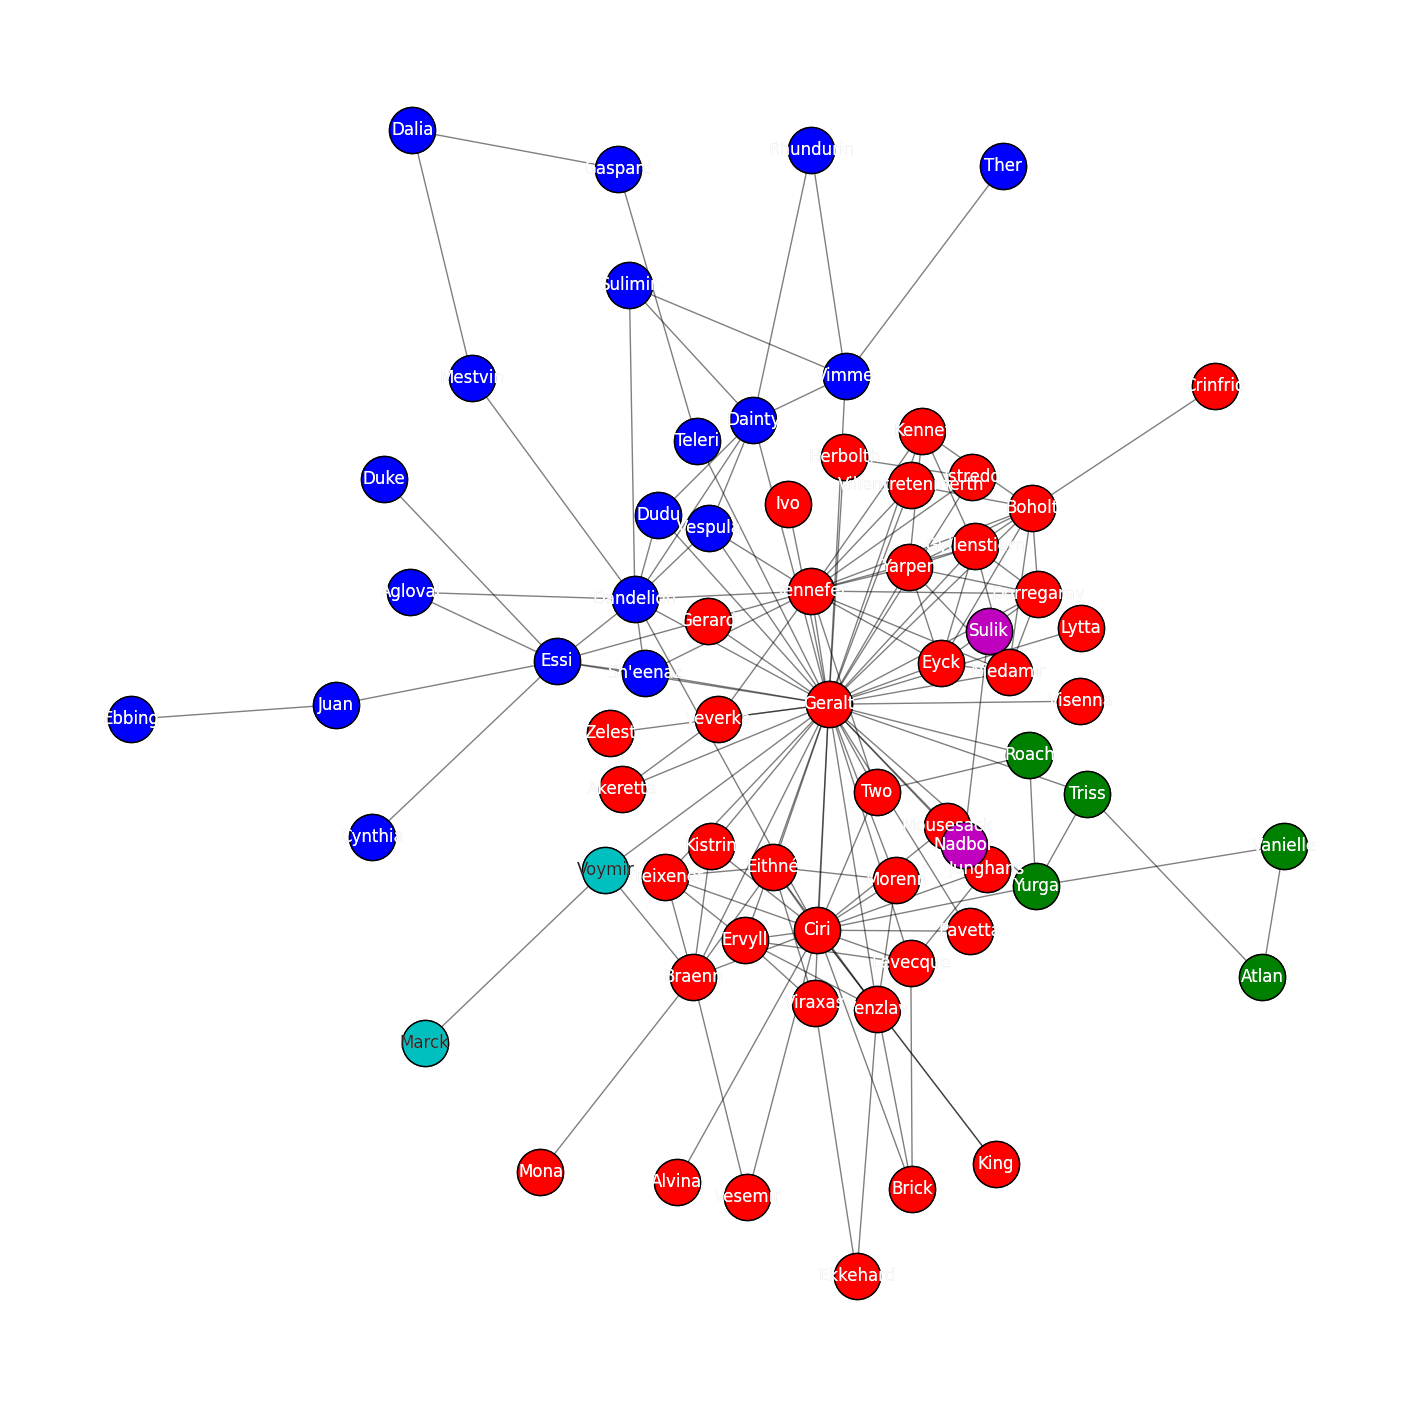

In [12]:
com_girvan = algorithms.girvan_newman(G1, level=3)
pos = nx.kamada_kawai_layout(G1)
print("Girvan_Newmen graph")
girvan_graph = viz.plot_network_clusters(G1, com_girvan, pos,figsize=(18,18),node_size=1100, plot_labels=True)

Louvain graph


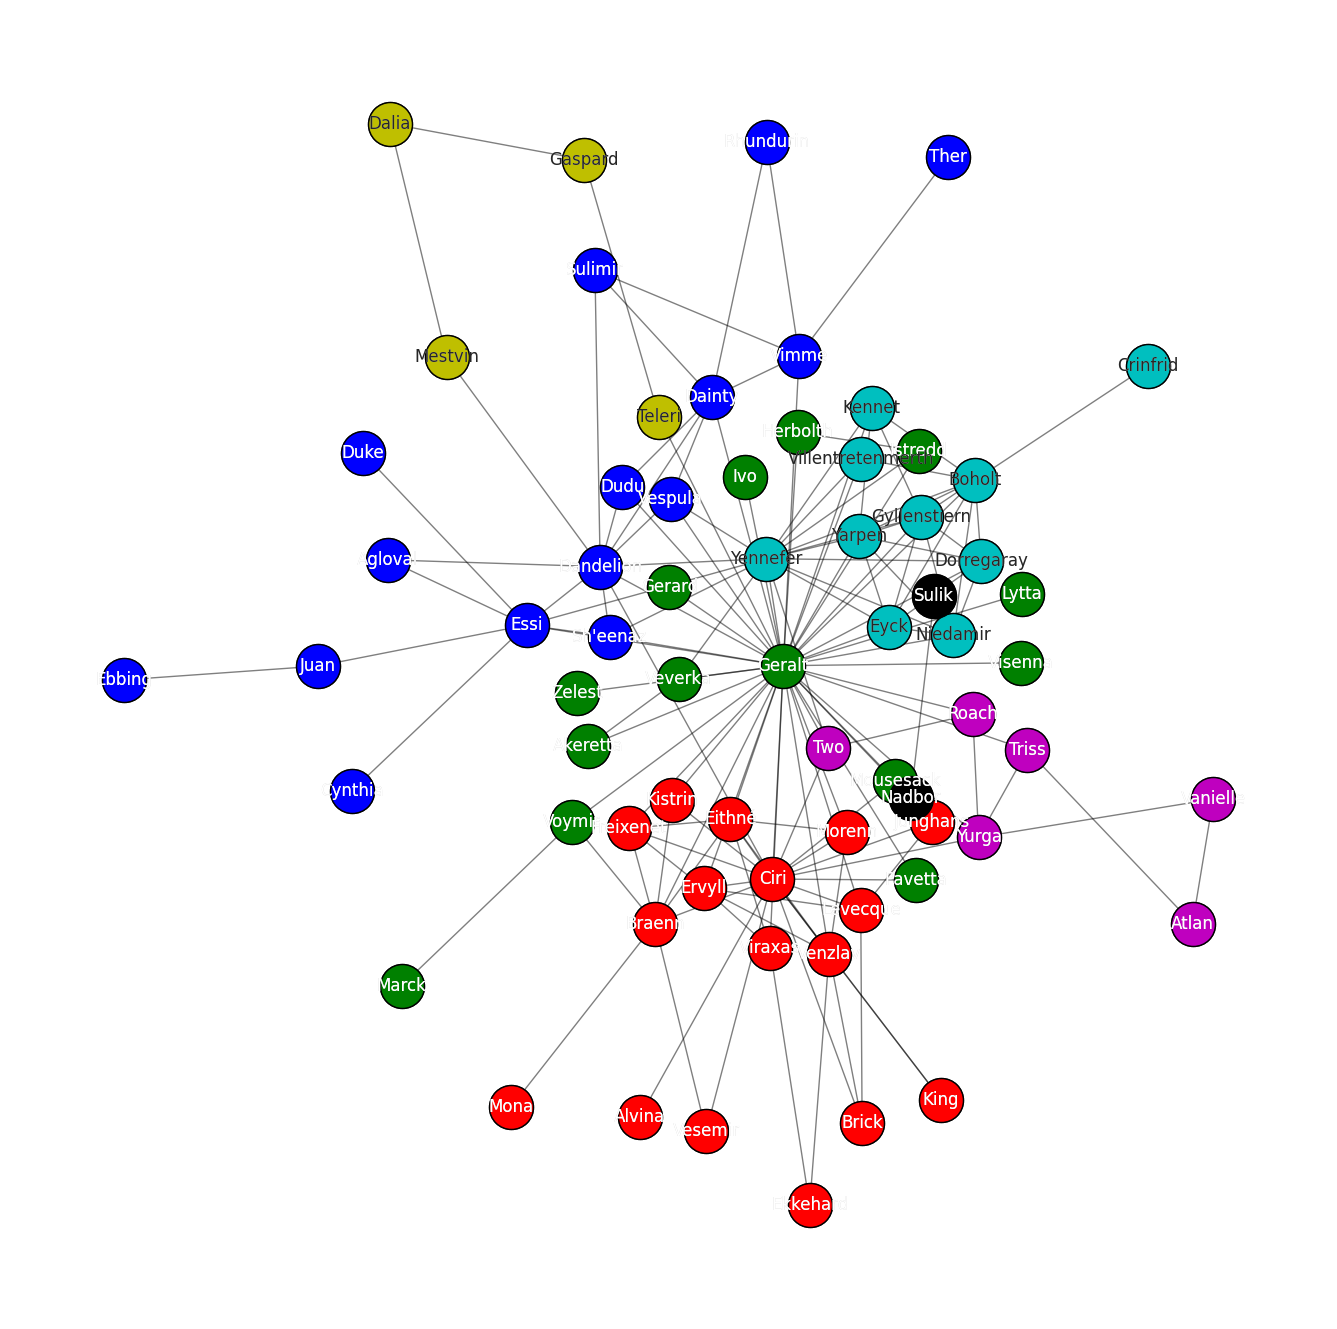

In [13]:
com_louvain1 = algorithms.louvain(G2, resolution=1)
pos1 = nx.kamada_kawai_layout(G2)
print("Louvain graph")
louvain_graph = viz.plot_network_clusters(G2, com_louvain1, pos1, figsize=(17,17),node_size=1000, plot_labels=True)

# # draw the graph
# pos = nx.kamada_kawai_layout(G2)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G2, pos, node_size=100,
#                        cmap=cmap, node_color=list(partition.values()),label=True)
# nx.draw_networkx_edges(G2, pos, alpha=0.5)

# plt.show()

Laiden graph


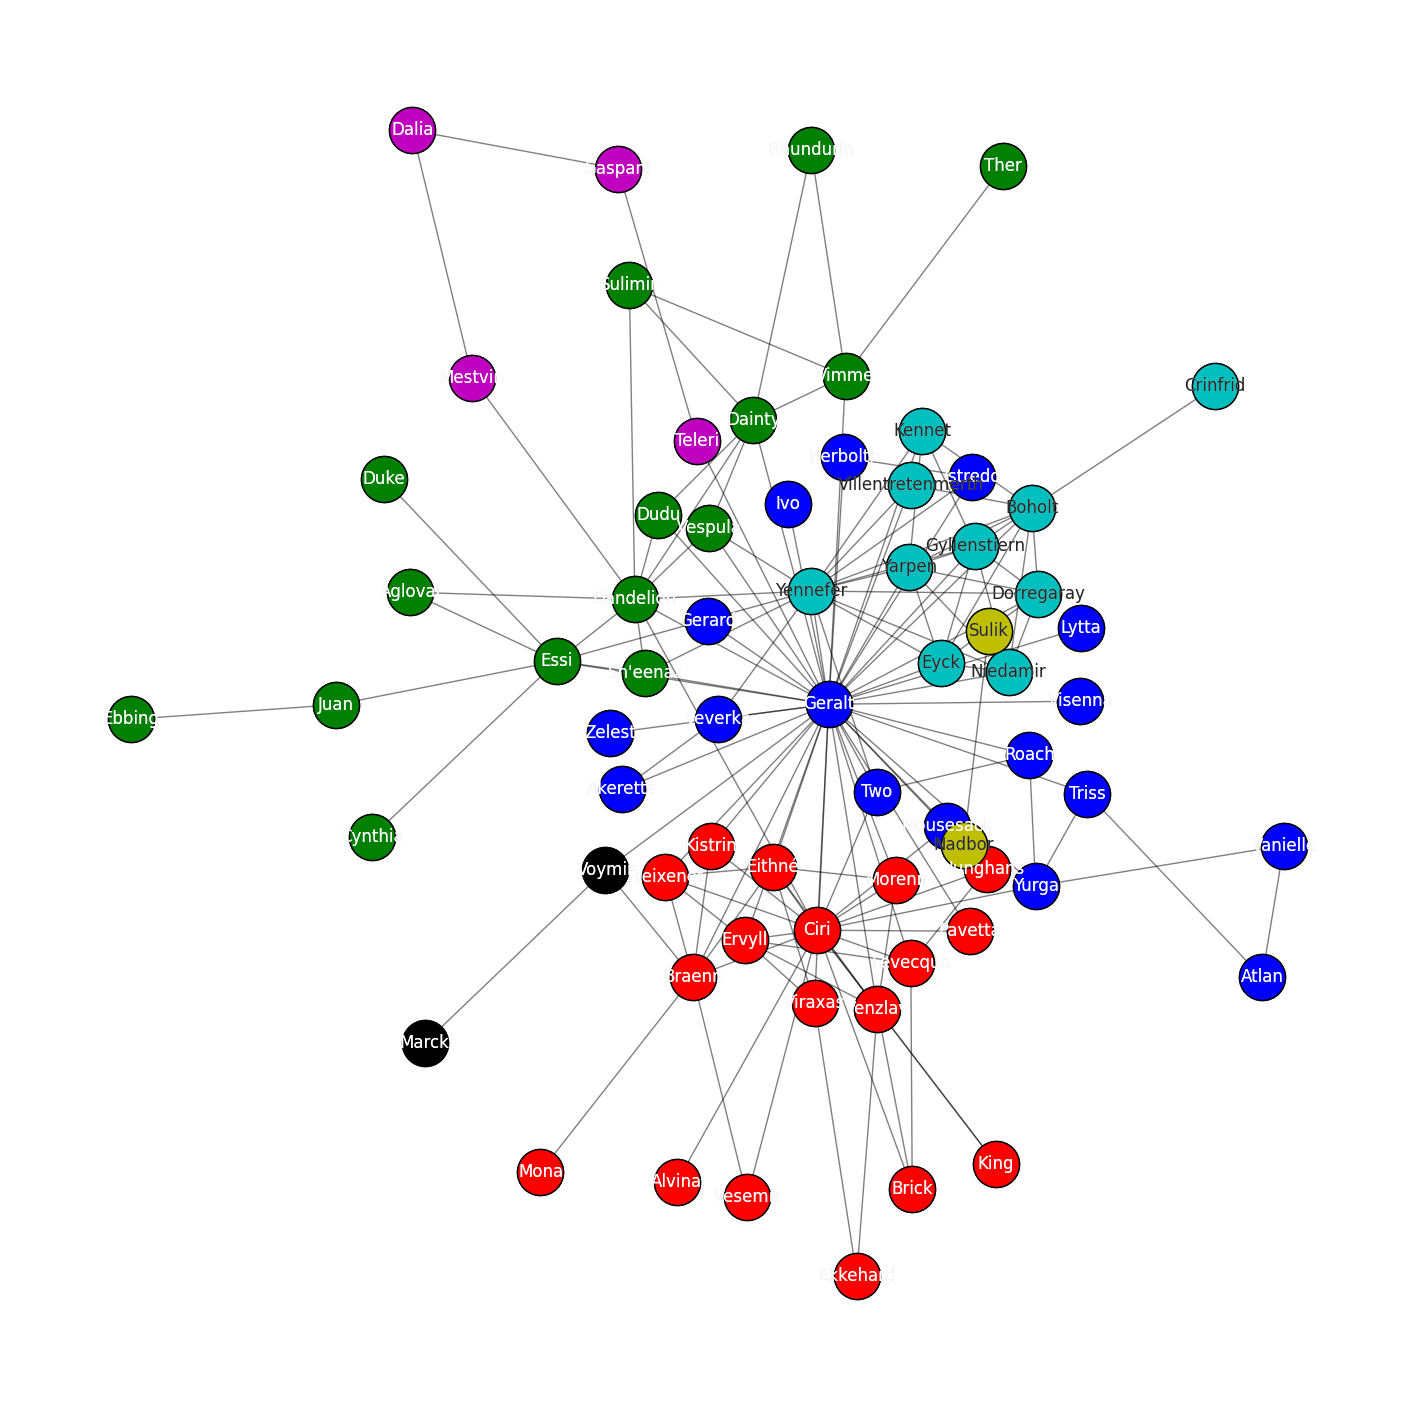

In [14]:
com_laiden = algorithms.leiden(G3)
pos = nx.kamada_kawai_layout(G3)
print("Laiden graph")
laiden_graph = viz.plot_network_clusters(G3, com_laiden, pos,figsize=(18,18),node_size=1100, plot_labels=True)

fuzzy graph


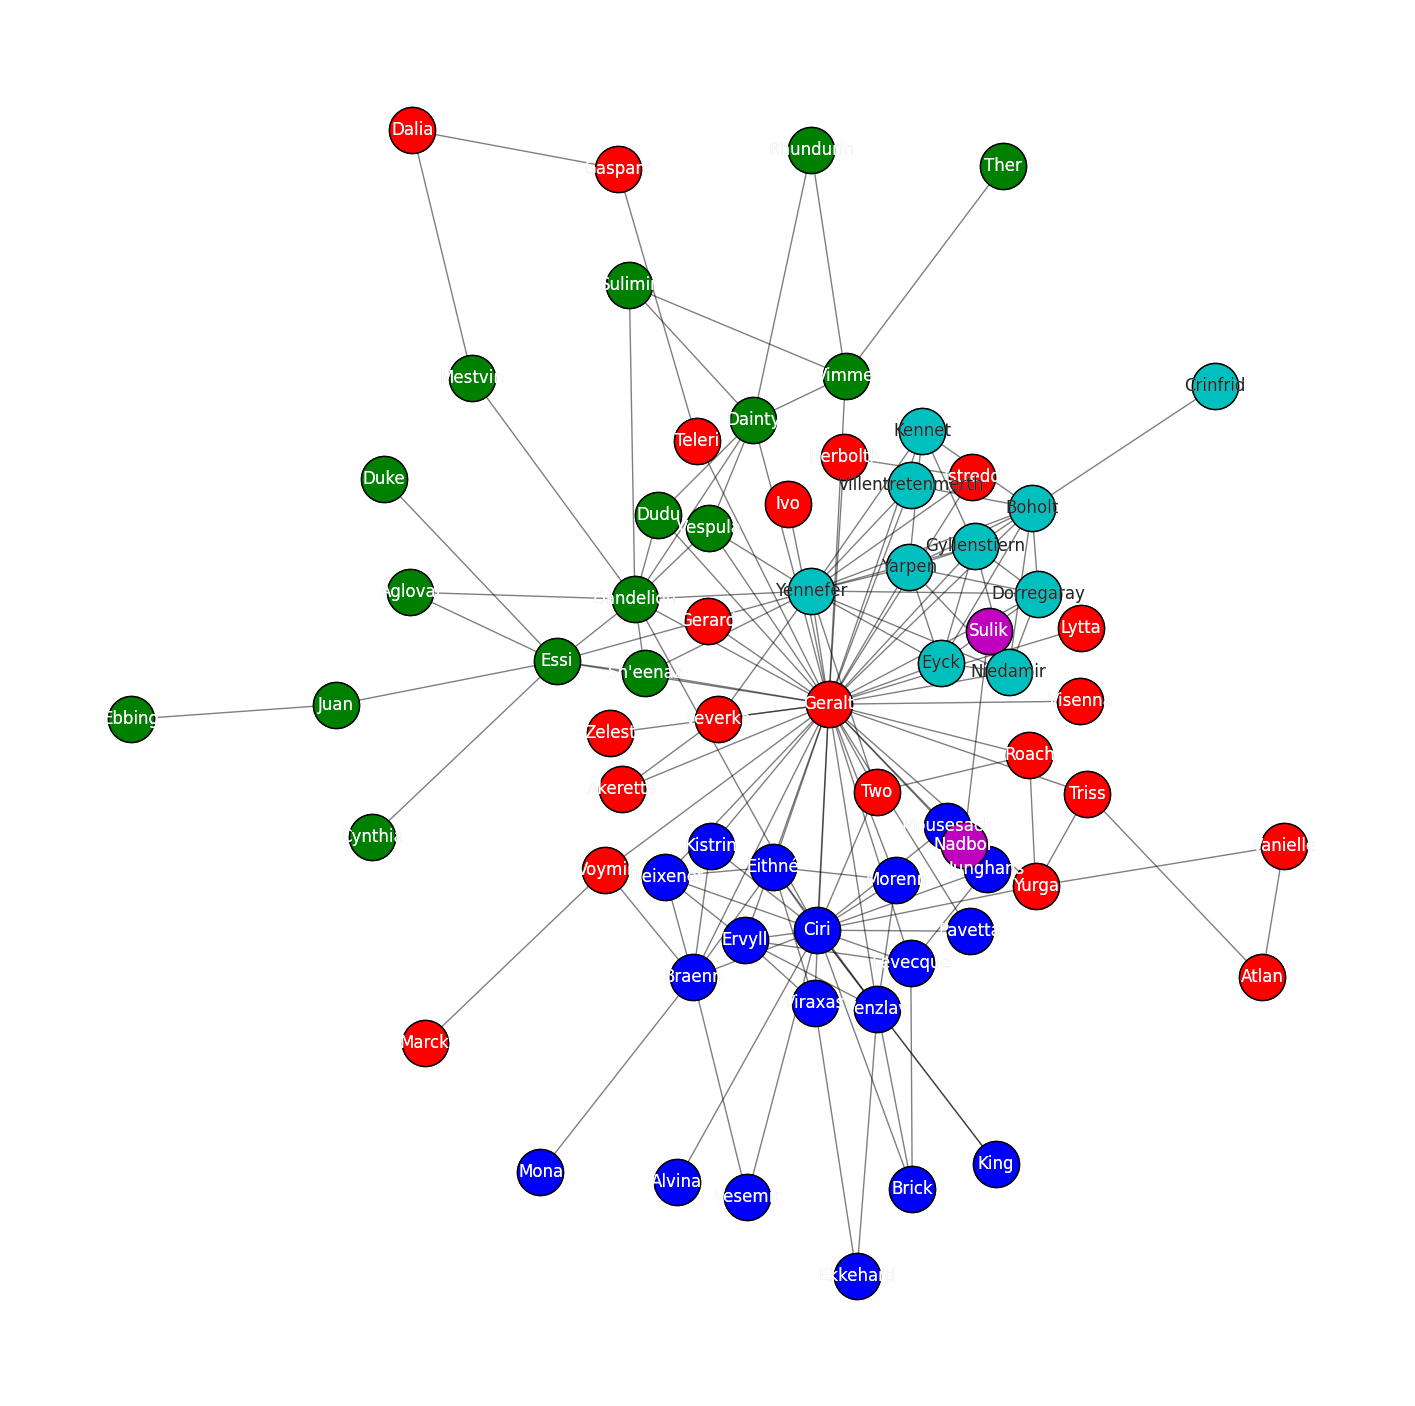

In [83]:
com_fuzzy = algorithms.chinesewhispers(G4, weighting = 'top', iterations=20)
pos = nx.kamada_kawai_layout(G4)
print("fuzzy graph")
fuzzy_graph = viz.plot_network_clusters(G4, com_fuzzy, pos,figsize=(18,18),node_size=1100, plot_labels=True)

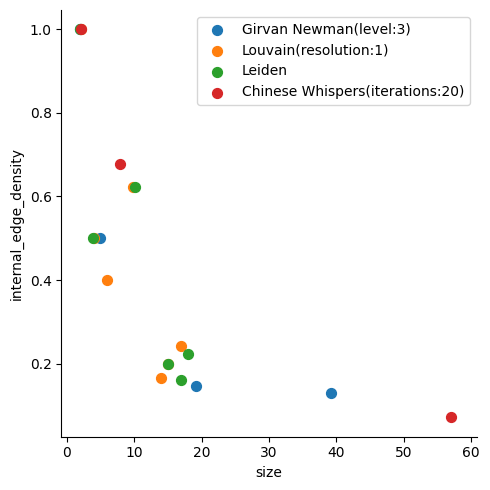

In [16]:
 # evaluation.overlapping_normalized_mutual_information_LFK(com_louvain1,com_laiden)
lmplot = viz.plot_com_properties_relation([com_girvan,com_louvain1,com_laiden,com_fuzzy],evaluation.size,evaluation.internal_edge_density)

## These 3 characteristics must be taken into account when determining whether the community structure discovered by the approach is good or not:
<ol>
   <b> <li>Separability: good communities have very few edges pointing from set S to the rest of the network, which indicates that they are well-separated from the rest of the network.<b>
    <li>Density: based on the assumption that good communities are well connected 
    <li>Cohesiveness and Clustering coefficient: A good community should be internally well and equally connected, which means it should be relatively difficult to divide a community into two subcommunities.
   
    

## 1) Evaluate the separability of the communities discovered by three approaches

<ul>
<b><li>Conductance: measures the fraction of total edge volume that points outside the cluster<b>

In [92]:
data =[]
a = evaluation.conductance(G1,com_girvan)
b = evaluation.conductance(G2,com_louvain1)
c = evaluation.conductance(G3,com_laiden)
d = evaluation.conductance(G4,com_fuzzy)
data.append(a)
data.append(b)
data.append(c)
data.append(d)
conductance_result = pd.DataFrame(data,columns=['Min ','Max ', 'Score','Standard Deviation'], index=['Girvan-Newman','Louvain','Laiden','Fuzzy'])
conductance_result

,Min,Max,Score,Standard Deviation
Girvan-Newman,0.0,0.500000,0.225955,0.176935
Louvain,0.0,0.552239,0.262009,0.155775
Laiden,0.0,0.500000,0.265512,0.154353
Fuzzy,0.0,0.409091,0.210957,0.129940


## 2) Evaluate the density of the communities discovered by three approaches

<ul>
<b> <li>Internal edge density: measures the fraction of the edges (out of all possible edges) that appear between the
nodes in S <b>

In [102]:
data1 =[]
a1 = evaluation.internal_edge_density(G1,com_girvan)
b1 = evaluation.internal_edge_density(G2,com_louvain1)
c1 = evaluation.internal_edge_density(G3,com_laiden)
d1 = evaluation.internal_edge_density(G4,com_fuzzy)
data1.append(a1)
data1.append(b1)
data1.append(c1)
data1.append(d1)
internal_edge_result = pd.DataFrame(data1,columns=['Min','Max', 'Score','Standard Deviation'], index=['Girvan-Newman','Louvain','Laiden','Fuzzy'])
internal_edge_result


,Min,Max,Score,Standard Deviation
Girvan-Newman,0.129487,1.0,0.555137,0.386589
Louvain,0.164835,1.0,0.447101,0.273578
Laiden,0.161765,1.0,0.529458,0.336033
Fuzzy,0.123810,1.0,0.426809,0.336798


<ul>
<b> <li>Average transitivity: tells how well connected the neighborhood of the node is. If the neighborhood is fully connected, the clustering coefficient is 1 and a value close to 0 means that there are hardly any connections in the neighborhood <b>

In [91]:
data2 =[]
a2 = evaluation.avg_transitivity(G1,com_girvan)
b2 = evaluation.avg_transitivity(G2,com_louvain1)
c2 = evaluation.avg_transitivity(G3,com_laiden)
d2 = evaluation.avg_transitivity(G4,com_fuzzy)
data2.append(a2)
data2.append(b2)
data2.append(c2)
data2.append(d2)
avg_tran = pd.DataFrame(data2,columns=['Min','Max', 'Score','Standard Deviation'], index=['Girvan-Newman','Louvain','Laiden','Fuzzy'])
avg_tran

,Min,Max,Score,Standard Deviation
Girvan-Newman,0.0,0.586105,0.187171,0.241114
Louvain,0.0,0.792063,0.288256,0.285192
Laiden,0.0,0.792063,0.296699,0.284269
Fuzzy,0.0,0.792063,0.389567,0.254553


<ul>
<b> <li>Fraction over median degree: Fraction of community nodes of having internal degree higher than the median degree value <b>

In [100]:
data3 =[]
a3 = evaluation.fraction_over_median_degree(G1,com_girvan)
b3 = evaluation.fraction_over_median_degree(G2,com_louvain1)
c3 = evaluation.fraction_over_median_degree(G3,com_laiden)
d3 = evaluation.fraction_over_median_degree(G4,com_fuzzy)
data3.append(a3)
data3.append(b3)
data3.append(c3)
data3.append(d3)
frac_median = pd.DataFrame(data3,columns=['Min','Max', 'Score','Standard Deviation'], index=['Girvan-Newman','Louvain','Laiden','Fuzzy'])
frac_median

,Min,Max,Score,Standard Deviation
Girvan-Newman,0.0,0.45,0.182632,0.170282
Louvain,0.0,0.50,0.320048,0.162611
Laiden,0.0,0.50,0.265359,0.183147
Fuzzy,0.0,0.40,0.254279,0.145864


<ul>
<b> <li>Flake-ODF: Fraction of nodes in S that have fewer edges pointing inside than to the outside of the community. <b>

In [97]:
data4 =[]
a4 = evaluation.flake_odf(G1,com_girvan)
b4 = evaluation.flake_odf(G2,com_louvain1)
c4 = evaluation.flake_odf(G3,com_laiden)
d4 = evaluation.flake_odf(G4,com_fuzzy)
data4.append(a4)
data4.append(b4)
data4.append(c4)
data4.append(d4)
flake_odf_result = pd.DataFrame(data4,columns=['Min','Max', 'Score','Standard Deviation'], index=['Girvan-Newman','Louvain','Laiden','Fuzzy'])
flake_odf_result

,Min,Max,Score,Standard Deviation
Girvan-Newman,0.0,0.500000,0.140000,0.195959
Louvain,0.0,0.166667,0.034014,0.059500
Laiden,0.0,0.500000,0.079832,0.172729
Fuzzy,0.0,0.047619,0.009524,0.019048


## 3) Evaluate the Cohesiveness and Clustering coefficient of the communities discovered by three approaches

<ul>
<b> <li>Triad Participation Ratio: Fraction of community nodes that belong to a triad. <b>

In [95]:
data5 =[]
a5 = evaluation.triangle_participation_ratio(G1,com_girvan)
b5 = evaluation.triangle_participation_ratio(G2,com_louvain1)
c5 = evaluation.triangle_participation_ratio(G3,com_laiden)
d5 = evaluation.triangle_participation_ratio(G4,com_fuzzy)
data5.append(a5)
data5.append(b5)
data5.append(c5)
data5.append(d5)
triad_result = pd.DataFrame(data5,columns=['Min','Max', 'Score','Standard Deviation'], index=['Girvan-Newman','Louvain','Laiden','Fuzzy'])
triad_result

,Min,Max,Score,Standard Deviation
Girvan-Newman,0.0,0.775,0.260263,0.328313
Louvain,0.0,0.900,0.384074,0.365314
Laiden,0.0,0.900,0.402614,0.362853
Fuzzy,0.0,0.900,0.527556,0.303600


In [23]:
rk = evaluation.FitnessRanking(G, [com_girvan, com_louvain1, com_laiden,com_fuzzy])
rk.rank(evaluation.fraction_over_median_degree)
rk.rank(evaluation.fraction_over_median_degree)
rk.rank(evaluation.edges_inside)
rk.rank(evaluation.cut_ratio)
rk.rank(evaluation.erdos_renyi_modularity)
rk.rank(evaluation.newman_girvan_modularity)
rk.rank(evaluation.modularity_density)
rnk, p_value = rk.friedman_ranking()
pc = rk.bonferroni_post_hoc()
pc


[post_hoc(comparison="Girvan Newman_{'level': 3} vs Louvain_{'weight': 'weight', 'resolution': 1, 'randomize': None}", z_value=2.012461179749811, p_value=0.044171344908442656, adj_p_value=0.13251403472532797),
 post_hoc(comparison="Girvan Newman_{'level': 3} vs Leiden_{'initial", z_value=1.118033988749895, p_value=0.2635524772829727, adj_p_value=0.7906574318489181),
 post_hoc(comparison="Girvan Newman_{'level': 3} vs Chinese Whispers_{'weighting': 'top', 'iterations': 20}", z_value=0.44721359549995787, p_value=0.6547208460185772, adj_p_value=1)]

In [24]:
>>> rk = evaluation.ComparisonRanking( [com_girvan, com_louvain1, com_laiden, com_fuzzy])
>>> result= rk.rank(evaluation.overlapping_normalized_mutual_information_MGH)
result

('overlapping_normalized_mutual_information_MGH',
 {"Girvan Newman_{'level': 3}_vs_Louvain_{'weight': 'weight', 'resolution': 1, 'randomize': None}": 0.3765237009290697,
  "Girvan Newman_{'level': 3}_vs_Leiden_{'initial_membership': None, 'weights': None}": 0.39499457502997953,
  "Girvan Newman_{'level': 3}_vs_Chinese Whispers_{'weighting': 'top', 'iterations': 20}": 0.1474152894272839,
  "Louvain_{'weight': 'weight', 'resolution': 1, 'randomize': None}_vs_Leiden_{'initial_membership': None, 'weights': None}": 0.7688868563116018,
  "Louvain_{'weight': 'weight', 'resolution': 1, 'randomize': None}_vs_Chinese Whispers_{'weighting': 'top', 'iterations': 20}": 0.1965095886809899,
  "Leiden_{'initial_membership': None, 'weights': None}_vs_Chinese Whispers_{'weighting': 'top', 'iterations': 20}": 0.20435743555914218})

## Centrality mearsure

In [25]:
centra_graph = nx.from_pandas_edgelist(data_clean,
                           source = 'source',
                           target = 'target',
                           edge_attr = 'value',
                           create_using = nx.Graph())
print(centra_graph)

Graph with 68 nodes and 153 edges


<AxesSubplot: >

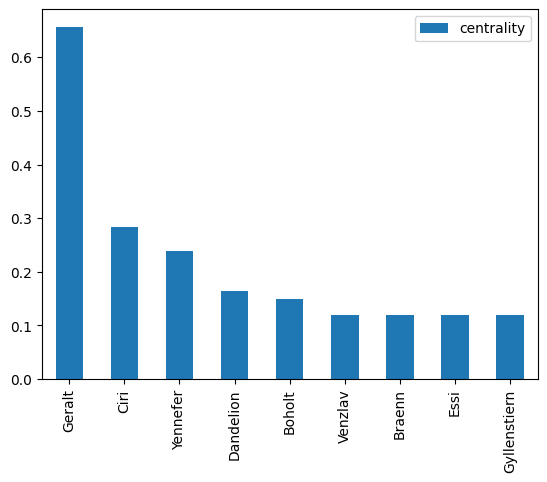

In [26]:
degree_centrality = nx.degree_centrality(centra_graph)
degree_plot = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['centrality'])
degree_plot.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")


<AxesSubplot: >

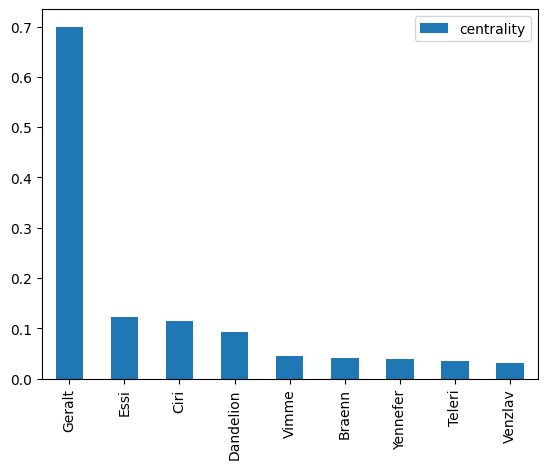

In [27]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(centra_graph)
betweenness_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['centrality'])
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

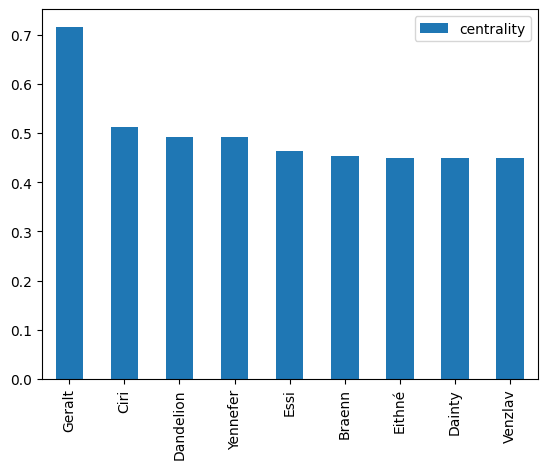

In [28]:
# Betweenness centrality
closeness_centrality = nx.closeness_centrality(centra_graph)
closeness_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [103]:
# conductance_result.to_csv(r'D:\huy\streamlit\task1_data\conductance1.csv',index=True)
# triad_result.to_csv(r'D:\huy\streamlit\task1_data\triad.csv',index=True)
# flake_odf_result.to_csv(r'D:\huy\streamlit\task1_data\Flake.csv',index=True)
# avg_tran.to_csv(r'D:\huy\streamlit\task1_data\Avg_trans.csv',index=True)
# frac_median.to_csv(r'D:\huy\streamlit\task1_data\Frac_median.csv',index=True)
internal_edge_result.to_csv(r'D:\huy\streamlit\task1_data\Internal_edge.csv',index=True)